In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/laptop.csv')

In [3]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [5]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [6]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [7]:
Category = []
Numuric = []

In [10]:
for col in df.columns:
  if df[col].dtype == 'object':
    Category.append(col)
  else:
    Numuric.append(col)

In [11]:
Category

['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']

In [12]:
Numuric

['Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD']

In [13]:
for col in Category:
  df[col].unique()

In [14]:
LE = LabelEncoder()
for col in Category:
    if len(df[col].unique()) <= 3:
        df[col] = LE.fit_transform(df[col])

    else:
        count_encoding = df[col].value_counts()
        df[col] = df[col].map(count_encoding)

In [15]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,21,194,8,1.37,11.175755,0,1,226.983005,423,0,128,1,0
1,21,194,8,1.34,10.776777,0,0,127.677940,423,0,0,1,0
2,268,706,8,1.86,10.329931,0,0,141.211998,423,0,256,1,1
3,21,194,16,1.83,11.814476,0,1,220.534624,515,0,512,0,0
4,21,194,8,1.37,11.473101,0,1,226.983005,423,0,256,1,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   int64  
 1   TypeName     1273 non-null   int64  
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   int64  
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   int64  
 12  Os           1273 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 129.4 KB


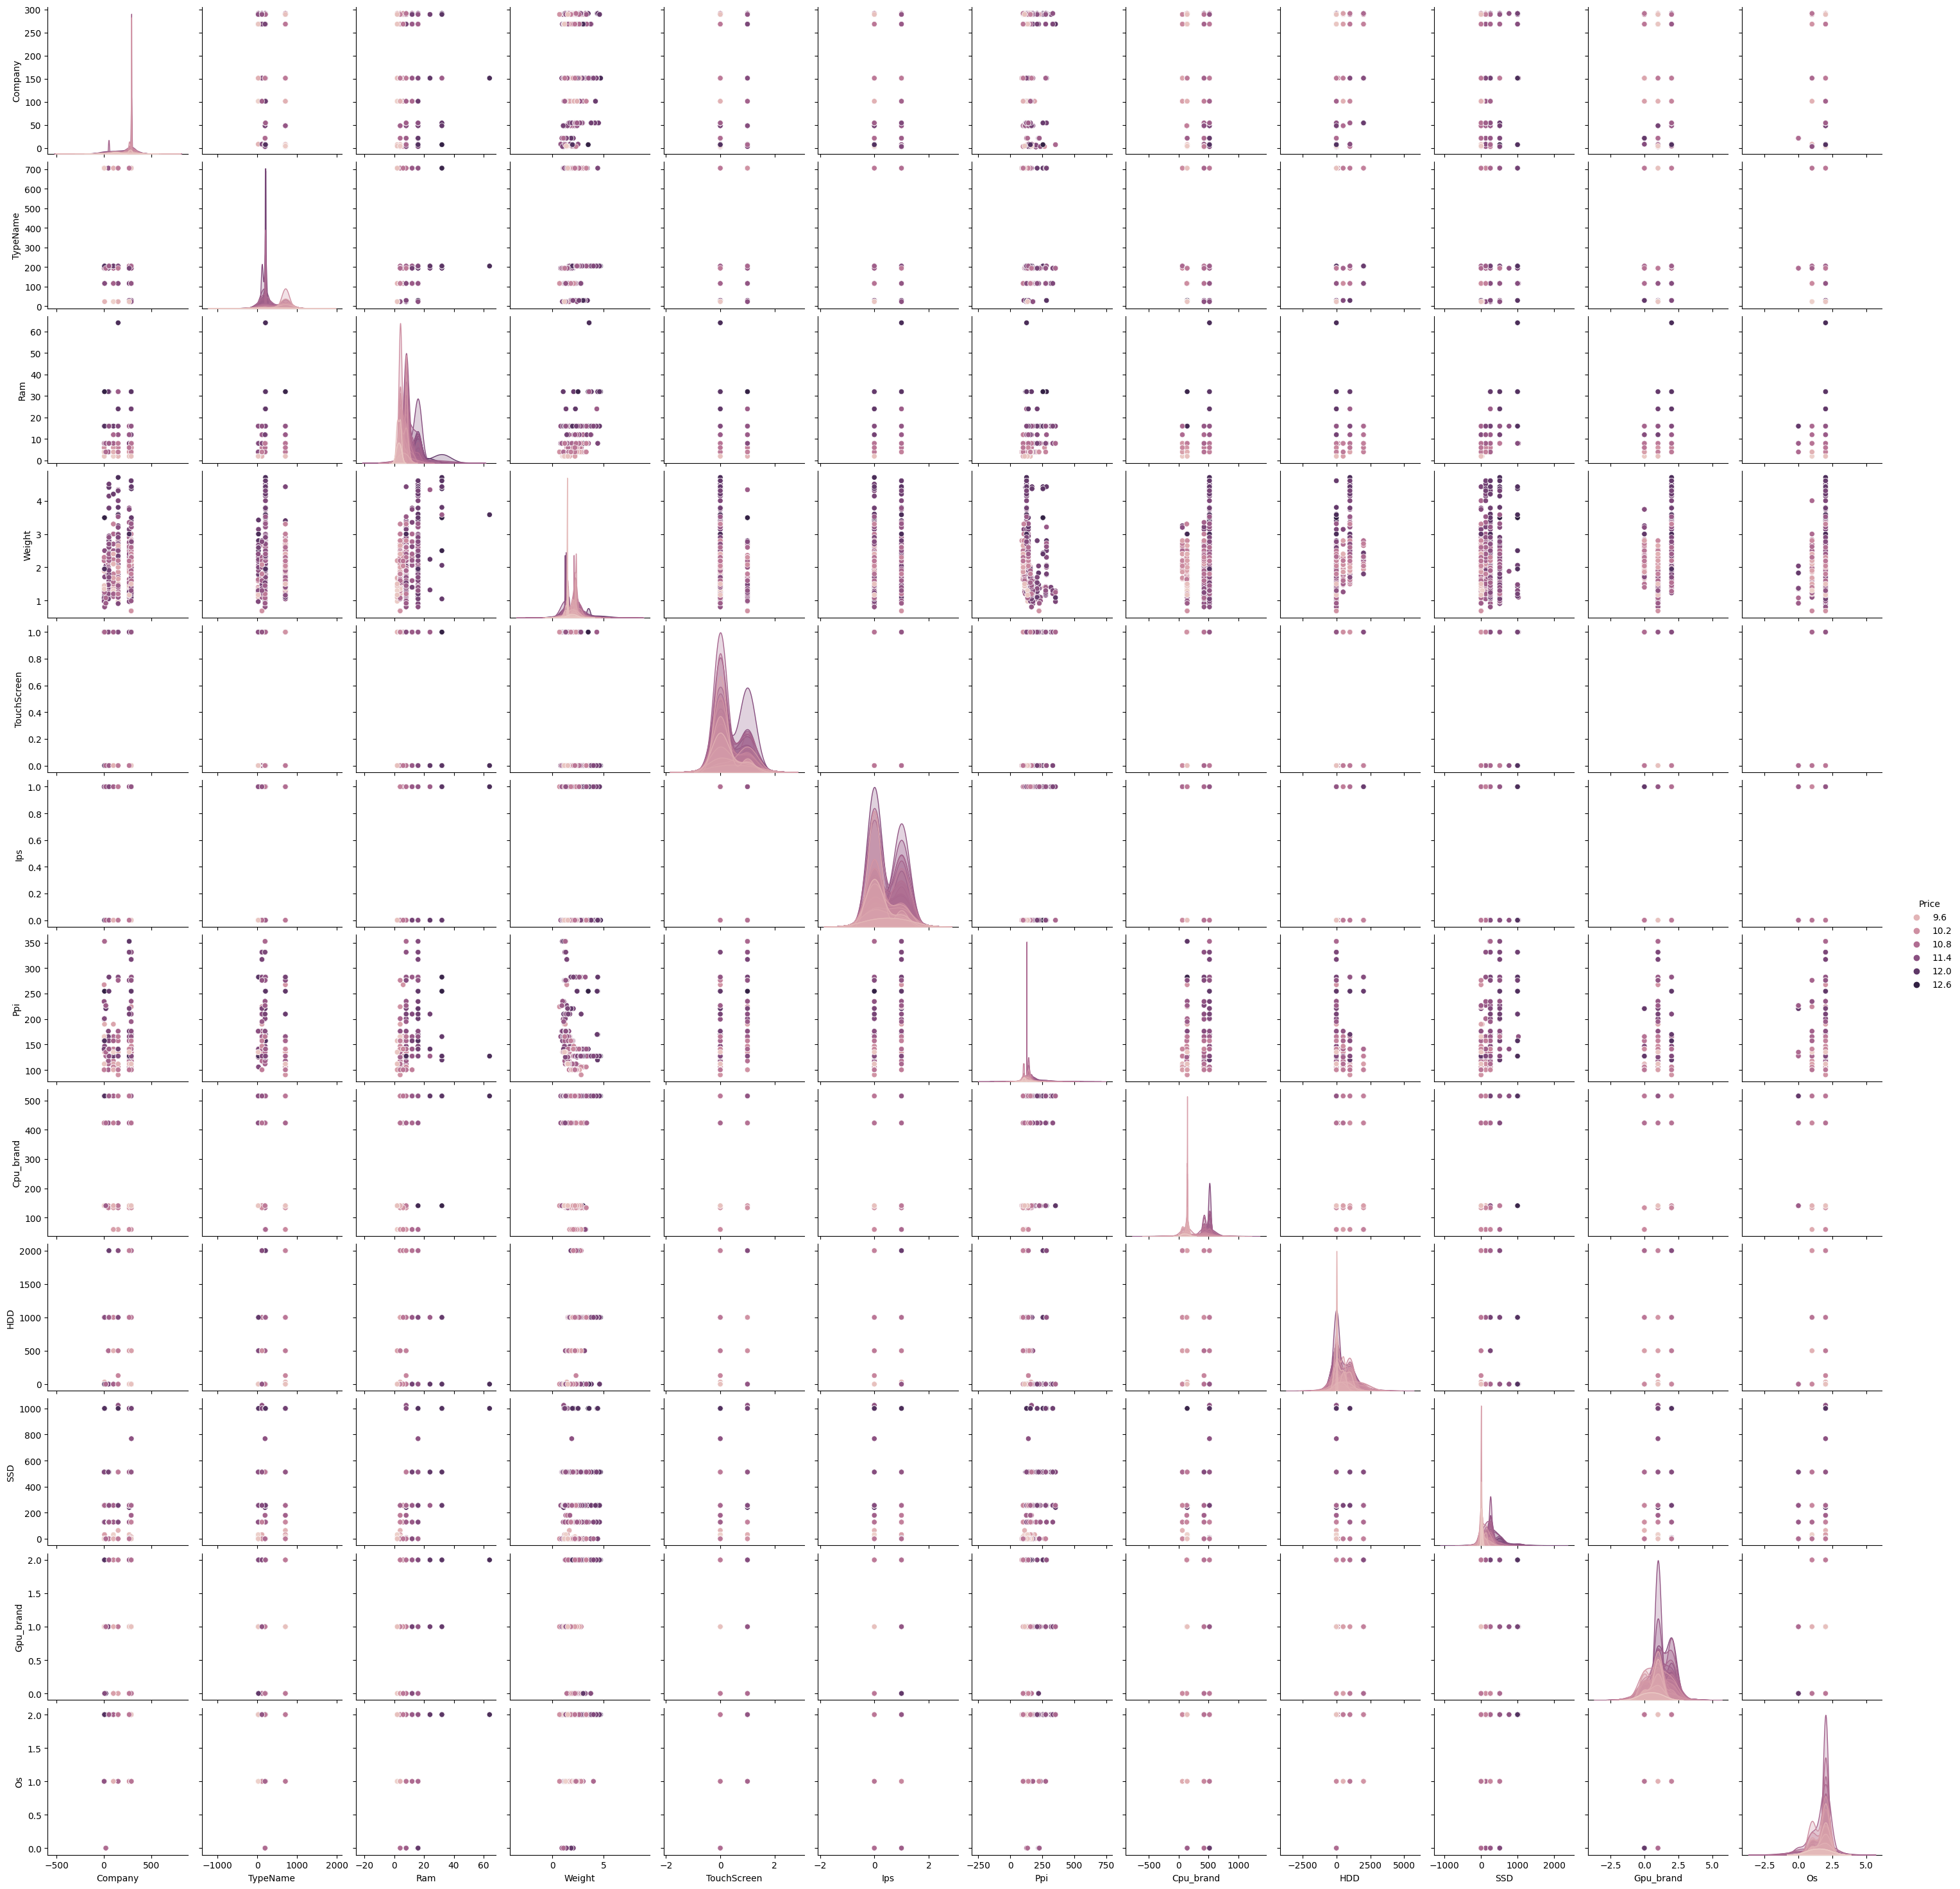

In [17]:
sns.pairplot(df,hue='Price')

<Axes: >

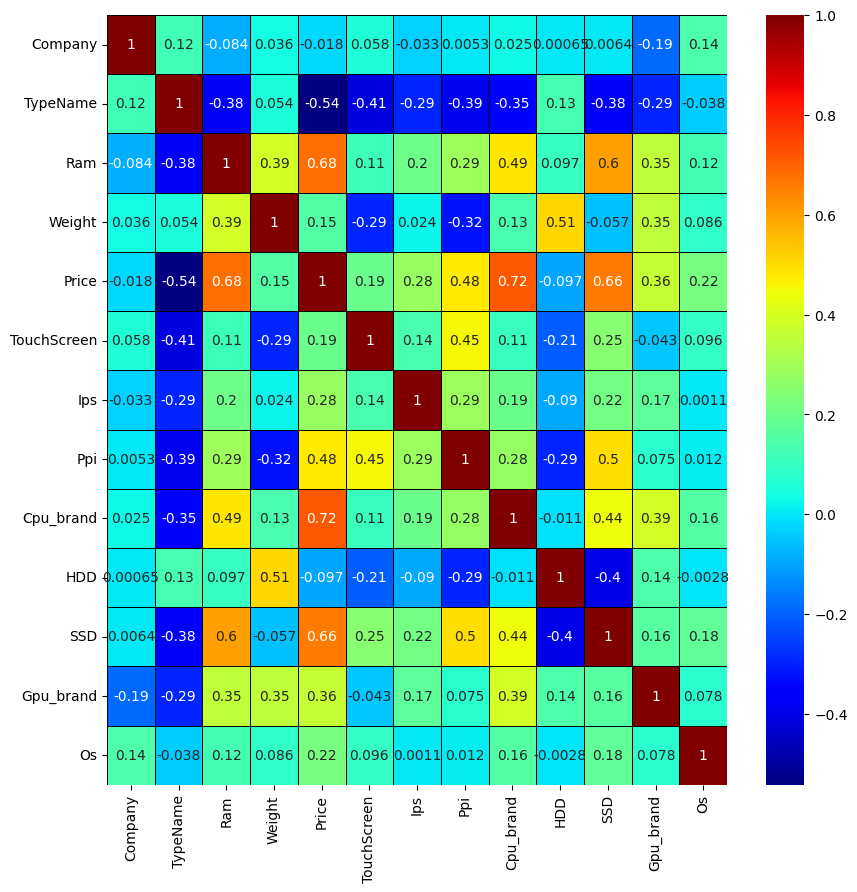

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='jet',linecolor='black',linewidths=0.5)

In [19]:
X = df.drop(columns = 'Price',axis = 1)
Y = df['Price']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=2)

In [21]:
model = LinearRegression()

In [ ]:
model.fit(X,Y)

In [23]:
y_pred = model.predict(x_test)

# **Model Evaluation**

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
mean_absolute_error(y_test,y_pred)

0.22507587970112217

In [26]:
mean_squared_error(y_test,y_pred)

0.08337660937539139

# **Best Fit Line**

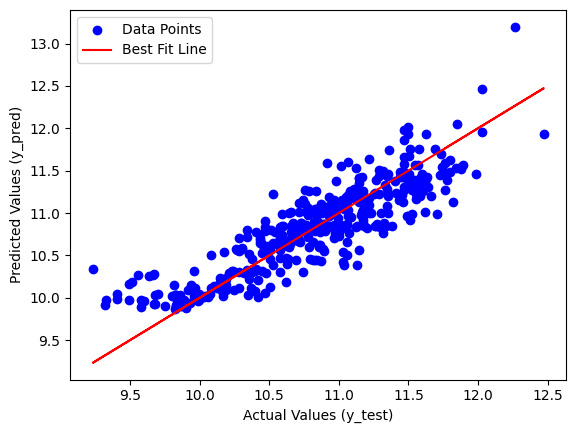

In [30]:
plt.scatter(y_test,y_pred,color = 'blue',label = "Data Points")
plt.plot(y_test,y_test,color = 'red',label = "Best Fit Line")

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()